Assignment 03
In the course we learned about a circuit that creates entanglement between 2 qubits. We also implemented this circuit in Qiskit.
For this assignment design a circuit that entangles 3 qubits to produce the following state:
1/sqrt(2)*(|000>+|111>)
Implement your designed circuit in Qiskit, and make sure that the input state is |000

State of quantum circuit: Statevector([0.70710678+0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.        +0.j, 0.        +0.j,
             0.        +0.j, 0.70710678+0.j],
            dims=(2, 2, 2))
['111', '000', '111', '111', '000', '111', '111', '111', '000', '000']


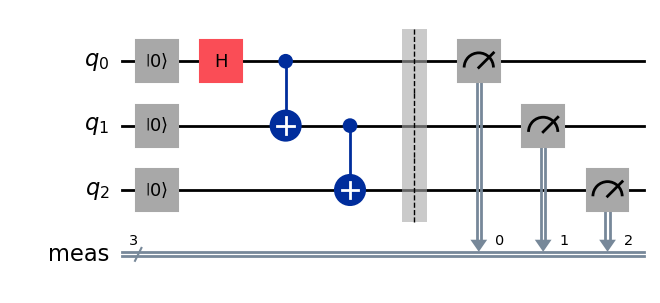

In [29]:
from qiskit import QuantumCircuit                         
from qiskit.quantum_info import Statevector               
from qiskit.primitives import StatevectorSampler       


ent_circ = QuantumCircuit(3) # Create a 3-qubit quantum circuit in the |0> state 

for qubit in range(3):     # Ensure all qubits are in the |0> state
    ent_circ.reset(qubit)  # Reset initializes each qubit to |0⟩

ent_circ.h(0) # Apply Hadamard gate to qubit 0, creates superposition

ent_circ.cx(0, 1) # Apply CNOT gate: control=0, target=1; entangle qubit 1 with qubit 0

ent_circ.cx(1, 2) # Apply CNOT gate: control=1, target=2; entangle qubit 2 with qubit 1

stateV = Statevector(ent_circ) # Get the statevector (quantum state)

ent_circ.measure_all() # Add measurement to all qubits

sampler = StatevectorSampler() # Create a sampler based on statevector (ideal simulation, no noise)

job = sampler.run([ent_circ], shots=10) # Run the simulation for 10 shots (samples),to be sure if the result is what we want

result = job.result()[0] # Get the result: first element of the result list

state = result.data.meas.get_bitstrings() # Extract the measured bitstrings from the result

print("State of quantum circuit:", stateV) # Print the ideal quantum state (before measurement)

print(state) # Print the sampled measured results

ent_circ.draw("mpl") # Draw the quantum circuit using matplotlib, I don't know why but it only worked for me with jupyter lab = .ipynb
# print(ent_circ.draw(output='text')) # Draw the quantum circuit, working in .py file